![](t51.PNG)

#### MONOMIOS ####
El valor para x = 8, analizado con la funcion hallada será: f_monomios(8)= [10.75924615508511]

Se muestra la gráfica de la función hallado con el método de monomios
y sobre ella los puntos dato dados, por los cuales pasa


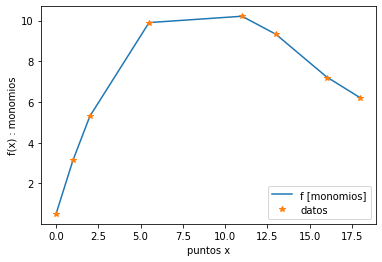

In [6]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

x=array([0,1,2,5.5,11,13,16,18],float32)
y=array([0.5,3.134,5.3,9.9,10.2,9.35,7.2,6.2],float32)

########################################       
########################################
'''
    MONOMIOS : Usamos la matriz de Vandermonde para poder llegar a la función
    que pase por los puntos dados
'''
def error(yhallado,ydado): #error entre los valores de dos listas (para la comparacion de valores reales y aprox)
    n = len(ydado)   #ambas tienen la misma logitud
    err = [] #lista para la el error en cada it
    it = []  #iteracion correspondiente
    for k in range (n):
        error = ydado[k] - yhallado[k]
        err.append(error)
        it.append(k)
    return(it,err)

def normav(xup,xlow):  #funcion para el error #Usado para el metodo Gauss-Seidel
    r = xup - xlow                 
    lim= len(r)
    temp=0
    for i in range (lim):
        temp += r[i]**2
    return temp**0.5

def upper(M):   #Usado para el metodo Gauss-Seidel
    limite = len(M)
    dim_M = M.shape
    U = zeros(dim_M)
    for i in range(limite):
        for j in range (i+1,limite):
            U[i][j] = M[i][j]
    return U

def met_GS(M,N):  #metodo con el que resolveremos el sistema Ax=y
    
    limite = len(M)
    #dividimos la matriz principal en matrices D, L y U
    U=upper(M)
    #Ahora L será lower + diagonal
    L = M - U
        
    #Lista de errores
    err_GS=[]
     
    X=[] #array para almacenar los valores de (x, y, z)
        
    #la 1era iteracion es especial pues debemos comenzar con un "guess value"
    #generalizamos para n pero en este ejercicio haremos (x0,y0,z0) = (0,0,0)
    
    for j in range(limite):
        x = 0
        X.append(x)
    i=len(X)
    #print(X)  
        
    #por lo anterior, esta parte siempre emperazará desde la 2da iteración
    epsilon =  0.00001
    err_it = 1
    iteracion=1 #pues ya se hizo la primera iteracion igualando a 0
    
    while err_it > epsilon :
        for k in range (limite):
            y= dot(linalg.inv(L), N - dot(U, X[0:i]))
            
        #buscamos el error, analizamos solo para el valor de x
        err_it= normav(y,X)
        err_GS.append(err_it)
        
        X=[] #vaciamos X y luego le agregamos los nuevos valores de y para la nueva iteracion
        #ingresamos los valores de y a la lista X
        for j in range (limite):
            X.append(y[j])
        #print(y,X,iteracion,err_it) #decomentar para ver la evolucion según se varía epsilon          
        y=[] #vaciamos y    
        iteracion += 1  
    return(X)

def mat_vandermonde(x,ordenmatriz): #genera la matriz de vandermonde 
    rango = len(x)
    M = zeros((rango,rango))
    for i in range (rango):
        for k in range (rango):
            M[k][i]= pow(x[k],i)    #potencias, desde x^{0} a x^{rango-1}
    return(M)

def recurrencia_mono(x,puntos): #funcion que aplica la eq de recurrencia a la lista ingresada    
    N = len(x)
    M = len(puntos)
    valsfuncion = []
    for i in range (M):
        fx = 0 
        for k in range (N):
            fx += x[k]*puntos[i]**k
        valsfuncion.append(fx)
    return(valsfuncion) #retorna una lista con los valores obtenidos

def monomios_zeros(x,y):
    
    rango = len(x)
    
    A = mat_vandermonde(x,rango)  #matriz A[rango][rango] de vandermonde 
    
#     X = linalg.solve(A, y)        #soluciona el problema Ax=y
    X= met_GS(A,y)
    
    funcion = []                  #lista para almacenar los valores aprox obtenidos
    
    funcion = recurrencia_mono(X,x) #aplica la formula de recurrencia de los monomios a X(vector) y los ptos dados x
    #print(funcion) #decomentar para ver los valores aproximados obtenidos con la función

    ptos_prueba = [8]   #agregar los ptos de prueba que se quiera analizar en la nueva funcion
    print("El valor para x = 8, analizado con la funcion hallada será: f_monomios(8)=",recurrencia_mono(X,ptos_prueba))
    plt.plot(x,funcion, label = "f [monomios]")
     
    return("")

print("#### MONOMIOS ####")  
print(monomios_zeros(x,y))
print("Se muestra la gráfica de la función hallado con el método de monomios")
print("y sobre ella los puntos dato dados, por los cuales pasa")
plt.ylabel('f(x) : monomios')
plt.xlabel('puntos x')
plt.plot(x,y,'*',label = "datos")  #puntos dados para comparación
plt.legend()
plt.show()


### LAGRANGE ###
El valor para x = 8, analizado con la funcion hallada será: f_lagrange(8)= 10.73450214142147

Para comparación, se presenta de la función hallada y los puntos dato dados


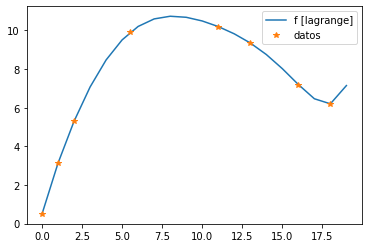

se generó un espacio con 20 puntos


In [11]:
########################################       
########################################
'''
    POLINOMIOS DE LAGRANGE:
'''

#Esta funcion solo regresa L[k] (un solo valor)
#se debe poner dentro de un loop para generar L[1:n] v L[0:n-1]
def valor_lk(t,x,k): #t: valor, x:puntos dados, k: subindice de L(recordar iniciarlo en 0)
    n = len(x)
    Lk=1
    xk=x[k]
    for i in range(n):
        if i==k:
            Lk=Lk*1                    #cuando x[i]=x[k]
        else:
            Lk=Lk*(t-x[i])/(xk-x[i])   #recurrencia
    return(Lk)

#NOTA: del texto: Lk(x_{j})= 0, condicion que no es necesario definir explicitamente pues
#la misma recurrencia aseguran que cuando t = x_{j} --> Lk = 0

def flagrange(x,y,espaciox): 
    ts = array(range(espaciox))  #generando el espacio en x para los valores aka rango
    lim = len(x)
   
    Lkt_vals = []  #Lista de Lk evaluados en t
    funcionLg = [] #valores evaluados en t en la funcion
    for i in range (espaciox):
        Lk_vals=[]     #lista para almacenar los valores temporales de Lk en t 
        t = ts [i]
        for k in range (lim):
            Lk = valor_lk(t,x,k)
            Lk_vals.append(Lk)
        f=0
        for j in range (lim):
            f+= y[j]*Lk_vals[j]
        funcionLg.append(f)
    
    #cambiar para diferentes puntos deseados, en este caso el pto deseado es 8
    print("El valor para x = 8, analizado con la funcion hallada será: f_lagrange(8)=",funcionLg[8])

    plt.plot(ts,funcionLg, label = "f [lagrange]")    
    return("")
        
print("### LAGRANGE ###")    
print(flagrange(x,y,20))
print("Para comparación, se presenta de la función hallada y los puntos dato dados")
plt.plot(x,y,'*',label = "datos")  #puntos dados para comparación
plt.legend()
plt.show() 
print("se generó un espacio con 20 puntos")




### NEWTON ###
El valor para x = 8, analizado con la funcion hallada será: f_lagrange(8)= 10.734502141421473

Para comparación, se presenta de la función hallada y los puntos dato dados


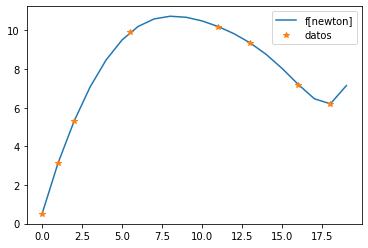

se generó un espacio con 20 puntos


In [12]:

########################################       
########################################

#funciones usadas para los polinomios de newton:

def normav(xup,xlow):                  #funcion para el error 
    r = xup - xlow
    lim= len(r)
    temp=0
    for i in range (lim):
        temp += r[i]**2
    return temp**0.5

def met_jacobi(M,N):
    #dividimos la matriz principal en matrices D, L y U
    limite = len(M)
    dim_M = M.shape
    #inicializamos las matrices
    D = zeros(limite) #la hacemos un solo vector con los valores de diagonal
    L = zeros(dim_M) #con tamaño dim_M=(rangoM,rangoM) por ser M cuadrada
    U = zeros(dim_M) 
    
    #Lista de errores
    err_jacobi=[]
    
    #llenamos las matrices
    
    #para la matriz D
    for i in range(limite):
        D[i] = M[i][i]
    #print(D) 
    
    #para la matriz U
    for i in range(limite):
        for j in range (i+1,limite):
            U[i][j] = M[i][j]
    #print(U) 
    
    #para la matriz L
    for i in range(limite):
        for j in range (i+1,limite):
            L[j][i] = M[j][i]
    #print(L) 
      
    SUM= L + U
    #print(SUM)
    #definir error para parar las iteraciones
    
    X=[] #array para almacenar los valores de (x, y, z)
        
    #la 1era iteracion es especial pues debemos comenzar con un "guess value"
    #generalizamos para n  e igualamos a 0. En este ejercicio: (x0,y0,z0) = (0,0,0)
    
    for j in range(limite):
        x = N[j]/D[j]
        X.append(x)
    i=len(X)
    #print(i)  
        
    #por lo anterior, esta parte siempre emperazará desde la 2da iteración
    epsilon =  0.0001
    err_it = 1
    iteracion=1 #pues ya se hizo la primera iteracion igualando a 0
    
    while err_it > epsilon :
        for k in range (limite):
            y = (N - dot(SUM,X[0:i]))/ D
            
        #buscamos el error, analizamos solo para el valor de x
        err_it= normav(y,X)
        err_jacobi.append(err_it)
        
        X=[] #vaciamos X y luego le agregamos los nuevos valores de y para la nueva iteracion
        #ingresamos los valores de y a la lista X
        for j in range (limite):
            X.append(y[j])
        y=[] #vaciamos y    
        iteracion += 1  
        #print(X,"__",iteracion,err_it)  #decomentar para ver la evolucion según se varía epsilon
    return(X)
                 

#####################
'''
    POLINOMIOS DE NEWTON:
'''
def pol_newton(x,y,espaciox):
    ts = array(range(espaciox))
    n = len(x)
    A=zeros((n,n))
    for i in range (n): #rellenando de 1s la primera columna
        A[i][0]=1
    for i in range (n): #rellenando los otros valores
        elem=1        
        for j in range(i):
            elem=elem*(x[i]-x[j])
            A[i][j+1] = elem   
        #después de este loop, nos queda el sistema AX=y
        #el cual se resolverá con Jacobi nuevamente
    X=met_jacobi(A,y)
    funcionNw=[]
    
    for i in range(espaciox):
        t= ts[i]
        recurr = [1]  #lista para los (t-ti), el primer elemento es 1
        r=1        
        for k in range (n-1):
            r = r*(t-x[k])
            recurr.append(r)
        f=0
        for k in range (n):
            f+= X[k]*recurr[k] # f1 = x1, f2= x1 + x2*(t-x1), f3 = x1 + x2*(t-x1) + x3*(t-x1)(t-x2), ...
        funcionNw.append(f)
        
    #cambiar para diferentes puntos deseados, en este caso el pto deseado es 8
    print("El valor para x = 8, analizado con la funcion hallada será: f_lagrange(8)=",funcionNw[8])    
    plt.plot(funcionNw,label = "f[newton]")
    return("")
        
print("### NEWTON ###")
print(pol_newton(x,y,20))
print("Para comparación, se presenta de la función hallada y los puntos dato dados")
plt.plot(x,y,'*',label = "datos")  #puntos dados para comparación
plt.legend()
plt.show()
print("se generó un espacio con 20 puntos") 


![](t5r.PNG)

Problema de Runge:



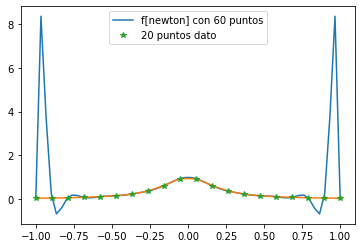

la interpolacion falla en los extremos del rango dado
###


In [13]:

########################################       
########################################
'''  
    PROBLEMA DE RUNGE:
''' 

#Sea la funcion
xpacio=20
r = linspace(-1,1,xpacio)              #espacio rango de x
fr = 1/(1+25*r**2)

def polr_newton(x,y,espaciox):
    ts =linspace(-1,1,espaciox)   #se cabio de array a un espacio rango entre -1 y 1 con espaciox:#pts
    n = len(x)
    A=zeros((n,n))
    for i in range (n): #rellenando de 1s la primera columna
        A[i][0]=1
    for i in range (n): #rellenando los otros valores
        elem=1        
        for j in range(i):
            elem=elem*(x[i]-x[j])
            A[i][j+1] = elem   
        #después de este loop, nos queda el sistema AX=y
        #el cual se resolverá con Gauss-Seidel nuevamente
    X=met_jacobi(A,y)
    funcionNw=[]
    
    for i in range(espaciox):
        t= ts[i]
        recurr = [1]  #lista para los (t-ti), el primer elemento es 1
        r=1        
        for k in range (n-1):
            r = r*(t-x[k])
            recurr.append(r)
        f=0
        for k in range (n):
            f+= X[k]*recurr[k]
        funcionNw.append(f)
        
    plt.plot(ts,funcionNw,label = "f[newton] con "+ str(espaciox)+" puntos")
    return("")

print("Problema de Runge:")
print(polr_newton(r,fr,60)) 
plt.plot(r,fr)
plt.plot(r,fr,'*',label =str(xpacio)+" puntos dato")
plt.legend()
plt.show()
print("la interpolacion falla en los extremos del rango dado")
print("###")


![](t52.PNG)


### LAGRANGE CON PUNTOS DE CHEBYSHEV Y EQUIDISTANTES ###
Se generó un conjunto de 50 datos distribuidos entre [0,1], luego se interpolo con 100 puntos para Lagrange.
Los datos ingresados en la función de lagrange se generaron usando puntos equidistantes y chebyshev


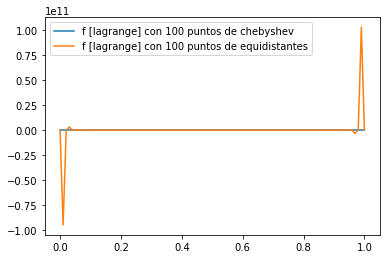

(el siguiente grafico es mostrado solo para comparacion de los puntos calculados directamente(sin interpolacion)
 con la evaluación de los puntos de chebyshev, ya que, lagrange con pts equidistantes, falla)


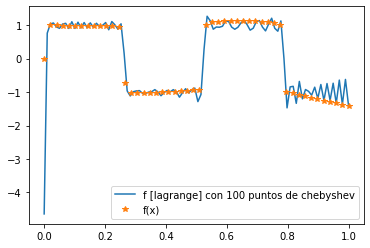

la interpolacion se creó con  100  puntos




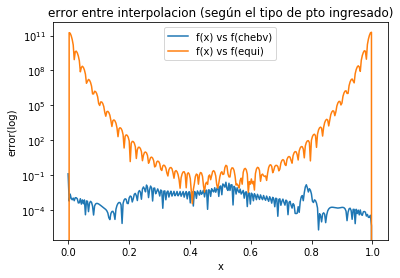

se muestra el error para un espacio de 300 puntos generados


In [14]:

########################################       
########################################
'''  
    PUNTOS DE CHEBYSHEV INTERPOLADOS CON LAGRANGE Y PTOS EQUIDISTANTTES:
''' 

#Sea la funcion

ttx = linspace(0,1,50)              #espacio rango de x
ff = tanh(20*sin(12*ttx))+exp(3*ttx)*sin(300*ttx)/50

def flagrange_modif(x,y,espaciox,nombreptos):  #modificado para trabajor con linspace
    ts = linspace(0,1,espaciox)  #generando el espacio en x para los valores aka rango 
    lim = len(x)
   
    Lkt_vals = []  #Lista de Lk evaluados en t
    funcionLg = [] #valores evaluados en t en la funcion
    for i in range (espaciox):
        Lk_vals=[]     #lista para almacenar los valores temporales de Lk en t 
        t = ts [i]
        for k in range (lim):
            Lk = valor_lk(t,x,k)
            Lk_vals.append(Lk)
        f=0
        for j in range (lim):
            f+= y[j]*Lk_vals[j]
        funcionLg.append(f)    
    
    return(ts,funcionLg,espaciox,nombreptos)

def fg(ts,funcionLg,espaciox,nombreptos): #hace la grafica de la funcion flagrange_modif
    return(plt.plot(ts,funcionLg, label = "f [lagrange] con "+str(espaciox)+" puntos de "+str(nombreptos)))
    
def pts_chebv(a,b,espaciox):
    n=espaciox
    X=[]
    for j in range(n):
        x = a + 0.5*(b-a)*(1+cos(j*pi/n))
        X.append(x)
    
    #aqui agregar la funcion del ejercicio
    funcionxvr = []
    for i in range (n):
        f = tanh(20*sin(12*X[i]))+exp(3*X[i])*sin(300*X[i])/50
        #aqui termina la funcion del ejercicio 
        funcionxvr.append(f)
      
    return(X,funcionxvr)



print("")
print("### LAGRANGE CON PUNTOS DE CHEBYSHEV Y EQUIDISTANTES ###")
print("Se generó un conjunto de 50 datos distribuidos entre [0,1], luego se interpolo con 100 puntos para Lagrange.")
print("Los datos ingresados en la función de lagrange se generaron usando puntos equidistantes y chebyshev")

###SE COMIENZA A GRAFICAR #### 
n=100 #nro de puntos para la interpolacion 
tx,f=pts_chebv(0,1,100)
cts,cfuncionLg,cespaciox,cnombreptos = flagrange_modif(tx,f,100,"chebyshev") #aqui se obtienen todos los datos de la func
print(fg(cts,cfuncionLg,cespaciox,cnombreptos))
eqts,eqfuncionLg,eqespaciox,eqnombreptos = flagrange_modif(ttx,ff,100,"equidistantes") #aqui se obtienen todos los datos de la func
print(fg(eqts,eqfuncionLg,eqespaciox,eqnombreptos))
plt.legend()
plt.show()
#### FIN GRAFICA ####

###SE COMIENZA A GRAFICAR #### 
print("(el siguiente grafico es mostrado solo para comparacion de los puntos calculados directamente(sin interpolacion)")
print(" con la evaluación de los puntos de chebyshev, ya que, lagrange con pts equidistantes, falla)")
print(fg(cts,cfuncionLg,cespaciox,cnombreptos))   #grafica nuevamente pts chevysheb en lagrange
# plt.plot(ttx,ff,label="f(x)") #decomentar para ver los datos como linea continua en lugar de "*"
plt.plot(ttx,ff,'*',label="f(x)") 
plt.legend()
plt.show()
print("la interpolacion se creó con ", n ," puntos")
#### FIN GRAFICA ####


#### ERROR ####
def err_pol(datos1,datos2,name):
    x=datos1
    n = len(datos1)
    y=datos2   
    err=[]
    itter = linspace(0,1,n)
    for i in range(n):
        temp_err=abs(y[i]-x[i])
        err.append(temp_err)
    
    plt.title("error entre interpolacion (según el tipo de pto ingresado)")
    plt.ylabel('error(log)')
    plt.xlabel('x')
    plt.plot(itter,err,label=str(name))
    return("")

#genero otro set de igual numero de puntos para la comparacion con la interpolacion de chebvyshev 
n=300 #mi pc ya no da mas uu
tttx = linspace(0,1,n)              #espacio rango de x
fff = tanh(20*sin(12*tttx))+exp(3*tttx)*sin(300*tttx)/50

#n=500 #nro de puntos para la interpolacion 
t1x,f1=pts_chebv(0,1,n)
c1ts,c1funcionLg,c1espaciox,c1nombreptos = flagrange_modif(t1x,f1,n,"chebyshev") #aqui se obtienen todos los datos de la func
eq1ts,eq1funcionLg,eq1espaciox,eq1nombreptos = flagrange_modif(ttx,ff,n,"equidistantes") #aqui se obtienen todos los datos de la func

#### GRAFICA DEL ERROR ####
print(err_pol(c1funcionLg,fff,"f(x) vs f(chebv)"))
print(err_pol(eq1funcionLg,fff,"f(x) vs f(equi)"))
plt.yscale('log')
plt.legend()
plt.show()

print("se muestra el error para un espacio de",n,"puntos generados") 